Nama Kelompok: Shenzhen Tech

Anggota kelompok:
1. Dharma Setiawan
2. Jefferson Joseph Tedjojuwono
3. Fikri Diva Sambasri


# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load *Dataset*

In [2]:
df_sosial_pend = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Data%20Sosial%20dan%20Kependudukan%20per%20Provinsi.csv')
df_ikkp1_2017_2021 = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Indeks%20Kedalaman%20Kemiskinan%20(P1)%20Menurut%20Kabupaten_Kota%202017%20-%202021.csv')
df_train = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Data_Train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Data_Test.csv')
df_uhh_t = pd.read_csv('https://raw.githubusercontent.com/dharmazz/UMKM/main/Umur%20Harapan%20Hidup%20Saat%20Lahir%20Komplit%202017.csv')
df_uhh = pd.read_csv('https://raw.githubusercontent.com/dharmazz/UMKM/main/Umur%20Harapan%20Hidup%20Saat%20Lahir%20Komplit.csv')
df_eko = pd.read_csv("https://raw.githubusercontent.com/dharmazz/UMKM/main/PDB%20Provinsi.csv", sep =';')
df_umkm = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Kredit%20UMKM.csv')

## Descriptive Statistic

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 26 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Id                                                               407 non-null    int64  
 1   Kabupaten/Kota                                                   407 non-null    object 
 2   Harapan Lama Sekolah (2019)                                      407 non-null    float64
 3   Harapan Lama Sekolah (2020)                                      407 non-null    float64
 4   Harapan Lama Sekolah (2021)                                      407 non-null    float64
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     407 non-null    int64  
 6   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    407 non-null    int64  
 7   Pengeluaran per Kapita Disesuaikan (Ribu Rup

Hasil Pengamatan:
1. Data terdiri dari 407 baris
2. Tampaknya tidak ada kolom yang memiliki missing value
3. Terdapat kejanggalan pada kolom (`Peringkat indeks pembangunan manusia 2019 - 2021`) yang berbentuk objek. Biasanya data peringkat seharusnya berbentuk numerik.

In [ ]:
df_train.isna().sum()

Id                                                                 0
Kabupaten/Kota                                                     0
Harapan Lama Sekolah (2019)                                        0
Harapan Lama Sekolah (2020)                                        0
Harapan Lama Sekolah (2021)                                        0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)       0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)      0
Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)      0
Rata-rata Lama Sekolah (2019)                                      0
Rata-rata Lama Sekolah (2020)                                      0
Rata-rata Lama Sekolah (2021)                                      0
Umur Harapan Hidup Saat Lahir (UHH) (2019)                         0
Umur Harapan Hidup Saat Lahir (UHH) (2020)                         0
Umur Harapan Hidup Saat Lahir (UHH) (2021)                         0
Indeks Pembangunan Manusia (2019) 

## Cuplikan Data

In [ ]:
df_train.sample(5)

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
125,152,Serdang Bedagai,12.59,12.60,12.61,11061,10950,11017,8.53,8.54,8.69,68.46,68.68,68.82,70.21,70.24,70.56,-,-,-,0.31,0.20,0.13,1.32,0.98,0.87
123,150,Pasaman,12.79,12.80,12.81,8599,8425,8440,7.86,8.09,8.10,67.18,67.40,67.59,66.46,66.64,66.77,-,-,-,0.11,0.11,0.13,0.59,0.70,0.67
400,502,Padang Lawas Utara,12.47,12.87,13.04,10194,9987,10055,9.10,9.37,9.38,67.06,67.17,67.22,69.29,69.85,70.11,-,-,-,0.26,0.22,0.24,1.18,1.20,1.29
374,468,Lingga,12.44,12.45,12.59,12091,11998,11938,6.51,6.67,6.88,61.75,62.06,62.39,64.98,65.29,65.83,-,-,-,0.46,0.58,0.90,1.97,2.32,2.98
148,183,Tanjung Jabung Barat,12.61,12.62,12.63,9539,9480,9699,7.70,7.71,8.00,68.03,68.12,68.17,67.54,67.54,68.16,-,-,-,0.44,0.38,0.53,1.68,1.58,1.96


## Statistical Summary

In [ ]:
# membagi data berdasarkan type datanya
df_category = df_train.select_dtypes(include='object')
df_numerical = df_train.select_dtypes(exclude='object')

df_numerical_cols = df_numerical.columns.to_list()
df_category_cols = df_category.columns.to_list()

print("Data numerik: ", df_numerical_cols)
print("Data category: ", df_category_cols)

Data numerik:  ['Id', 'Harapan Lama Sekolah (2019)', 'Harapan Lama Sekolah (2020)', 'Harapan Lama Sekolah (2021)', 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)', 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)', 'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)', 'Rata-rata Lama Sekolah (2019)', 'Rata-rata Lama Sekolah (2020)', 'Rata-rata Lama Sekolah (2021)', 'Umur Harapan Hidup Saat Lahir (UHH) (2019)', 'Umur Harapan Hidup Saat Lahir (UHH) (2020)', 'Umur Harapan Hidup Saat Lahir (UHH) (2021)', 'Indeks Pembangunan Manusia (2019)', 'Indeks Pembangunan Manusia (2020)', 'Indeks Pembangunan Manusia (2021)', 'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ', 'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ', 'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) ', 'Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)', 'Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)', 'Indeks Ke

In [ ]:
# Ringkasan statistik kolom numerik
df_train[df_numerical_cols].describe()

,Id,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,254.542998,12.835651,12.900295,12.963661,10350.257985,10165.857494,10232.029484,8.186511,8.310418,8.405946,69.279066,69.430516,69.535799,69.285553,69.384521,69.680541,0.587224,0.561106,0.585749,2.112727,2.061499,2.121278
std,148.888236,1.363455,1.350578,1.338904,2665.411454,2649.712849,2671.995442,1.663764,1.650030,1.647457,3.475954,3.448321,3.432372,6.621864,6.593220,6.571755,0.888473,0.817328,0.863150,2.141924,2.050201,2.002196
min,1.000000,3.290000,3.610000,3.870000,4181.000000,3975.000000,3976.000000,0.970000,1.130000,1.420000,55.120000,55.270000,55.430000,30.750000,31.550000,32.840000,0.020000,0.000000,0.030000,0.160000,0.070000,0.190000
25%,122.500000,12.285000,12.350000,12.410000,8598.500000,8456.000000,8539.500000,7.285000,7.435000,7.510000,67.005000,67.170000,67.255000,66.170000,66.210000,66.475000,0.170000,0.180000,0.200000,0.840000,0.875000,0.940000
50%,256.000000,12.810000,12.850000,12.910000,10298.000000,10121.000000,10198.000000,8.100000,8.240000,8.300000,69.570000,69.750000,69.780000,69.040000,69.180000,69.530000,0.340000,0.330000,0.360000,1.520000,1.470000,1.590000
75%,384.500000,13.455000,13.490000,13.595000,11763.000000,11549.000000,11671.000000,9.110000,9.270000,9.335000,71.560000,71.630000,71.745000,72.535000,72.660000,72.955000,0.610000,0.600000,0.635000,2.535000,2.345000,2.520000
max,511.000000,17.390000,17.790000,17.800000,23851.000000,23575.000000,23888.000000,12.640000,12.650000,12.830000,77.550000,77.650000,77.730000,85.070000,85.410000,85.710000,8.680000,6.990000,8.120000,16.350000,13.870000,14.870000


Hasil Pengamatan:
1. Tidak ada nilai data yang bernilai negatif
2. Terdapat data yang berbentuk skew ke kanan pada kolom (`Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019)`), (`Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020)`), (`Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021)`), (`Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)`), (`Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)`), (`Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)`)
3. Tidak ada data yang bernilai boolean (1/0)

In [ ]:
# Ringkasan statistik kolom category
df_train[df_category_cols].describe()

,Kabupaten/Kota,Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021)
count,407,407,407,407
unique,407,11,11,11
top,Buton Tengah,-,-,-
freq,1,397,397,397


Hasil Pengamatan:
1. Terdapat nilai unique yang besar pada kolom (`kabupaten/kota`) dan (`Peringkat Indeks Pembangunan Manusia 2019 - 2021`) yang mana ini akan berdampak buruk pada proses modeling nanti sehingga kolom tersebut bisa di drop saja nantinya di saat data preprocessing
2. Kolom (`Peringkat Indeks Pembangunan Manusia 2019 - 2021`) di dominasi oleh nilai "-"

## Value Counting
Memeriksa pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [ ]:
for col in df_category_cols:
    print(f'''Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Value count kolom Kabupaten/Kota:
Buton Tengah                 1
Humbang Hasundutan           1
Musi Rawas                   1
Bolaang Mongondow Utara      1
Ogan Komering Ulu Selatan    1
                            ..
Konawe Selatan               1
Dharmasraya                  1
Kudus                        1
Buleleng                     1
Katingan                     1
Name: Kabupaten/Kota, Length: 407, dtype: int64

Value count kolom Peringkat Indeks Pembangunan Manusia (2019):
-     397
27      1
7       1
14      1
19      1
28      1
25      1
20      1
34      1
31      1
26      1
Name: Peringkat Indeks Pembangunan Manusia (2019), dtype: int64

Value count kolom Peringkat Indeks Pembangunan Manusia (2020):
-     397
27      1
7       1
14      1
19      1
28      1
25      1
20      1
34      1
31      1
26      1
Name: Peringkat Indeks Pembangunan Manusia (2020), dtype: int64

Value count kolom Peringkat Indeks Pembangunan Manusia (2021):
-     397
28      1
6       1
12     

## Univariate Analysis

### Viloin Plot

In [ ]:
harapan_lama_sekolah = ["Harapan Lama Sekolah (2019)", "Harapan Lama Sekolah (2020)", "Harapan Lama Sekolah (2021)"]
ppk = ["Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)", "Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)", "Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)"]
rls = ["Rata-rata Lama Sekolah (2019)", "Rata-rata Lama Sekolah (2020)", "Rata-rata Lama Sekolah (2021)"]
uhh = ["Umur Harapan Hidup Saat Lahir (UHH) (2019)", "Umur Harapan Hidup Saat Lahir (UHH) (2020)", "Umur Harapan Hidup Saat Lahir (UHH) (2021)"]
ipm = ["Indeks Pembangunan Manusia (2019)", "Indeks Pembangunan Manusia (2020)", "Indeks Pembangunan Manusia (2021)"]
ikkp2 = ["Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ", "Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ", "Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) "]
ikkp1 = ["Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)", "Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)", "Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)"]

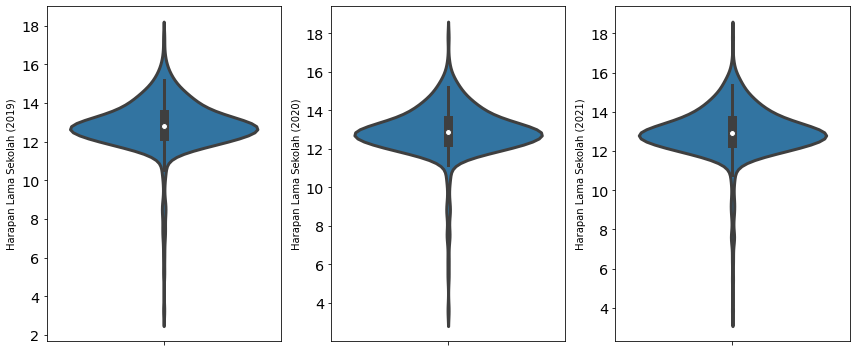

In [ ]:
# Violinplot Visualization Harapan Lama Sekolah
plt.figure(figsize=(12, 5))
features1 = harapan_lama_sekolah
for i in range(0, len(features1)):
    plt.subplot(1, len(features1), i+1)
    sns.violinplot(y=df_train[features1[i]])
    plt.tight_layout()

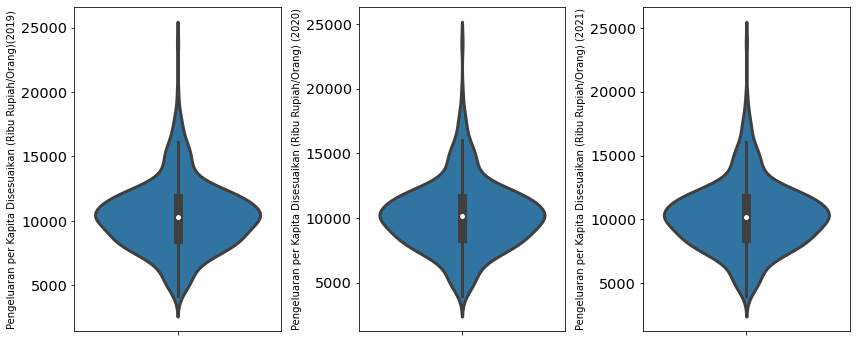

In [ ]:
# Violinplot Visualization Pengeluaran Per Kapita
plt.figure(figsize=(12, 5))
features2 = ppk
for i in range(0, len(features2)):
    plt.subplot(1, len(features2), i+1)
    sns.violinplot(y=df_train[features2[i]])
    plt.tight_layout()

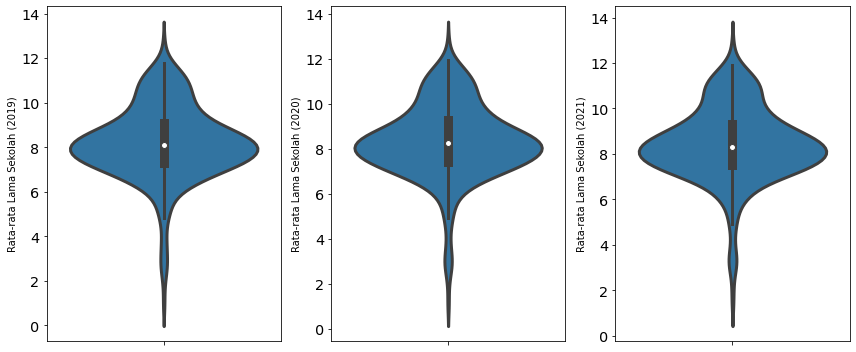

In [ ]:
# Violinplot Visualization Rata-Rata Lama Sekolah
plt.figure(figsize=(12, 5))
features3 = rls
for i in range(0, len(features3)):
    plt.subplot(1, len(features3), i+1)
    sns.violinplot(y=df_train[features3[i]])
    plt.tight_layout()

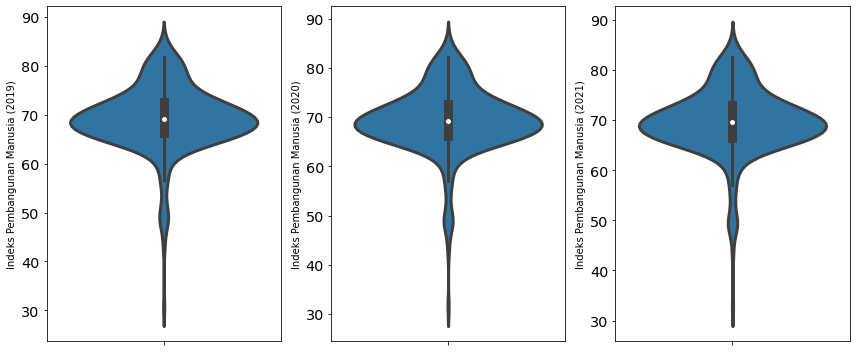

In [ ]:
# Violinplot Visualization Indeks Pembangunan Manusia
plt.figure(figsize=(12, 5))
features4 = ipm
for i in range(0, len(features4)):
    plt.subplot(1, len(features4), i+1)
    sns.violinplot(y=df_train[features4[i]])
    plt.tight_layout()

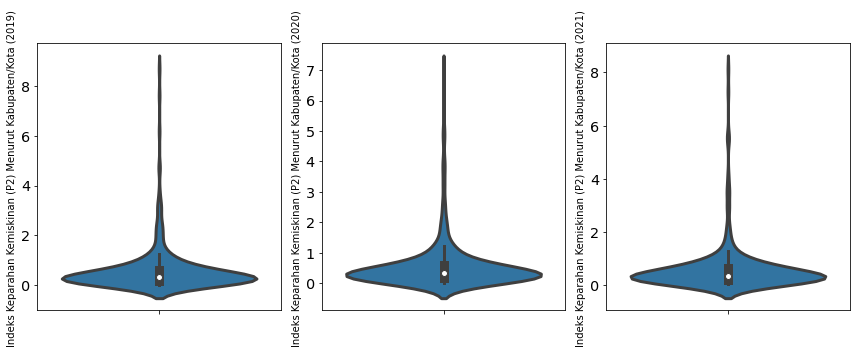

In [ ]:
# Violinplot Visualization Indeks Keparahan Kemiskinan (P2)
plt.figure(figsize=(12, 5))
features5 = ikkp2
for i in range(0, len(features5)):
    plt.subplot(1, len(features5), i+1)
    sns.violinplot(y=df_train[features5[i]])
    plt.tight_layout()

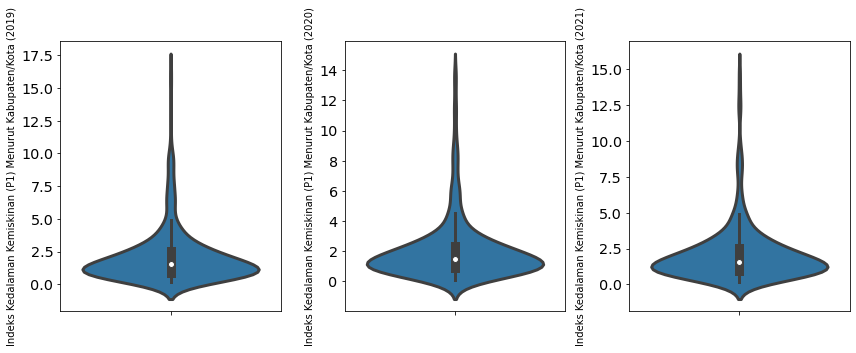

In [ ]:
# Violinplot Visualization Indeks Kedalaman Kemiskinan (P1)
plt.figure(figsize=(12, 5))
features6 = ikkp1
for i in range(0, len(features6)):
    plt.subplot(1, len(features6), i+1)
    sns.violinplot(y=df_train[features6[i]])
    plt.tight_layout()

Hasil Pengamatan:

Dari visualisasi violin plot tersebut dapat dilihat kalau setiap data memiliki nilai outlier dikarenakan bentuk ekor violin plot tersebut memanjang panjang

### Scatter Plot

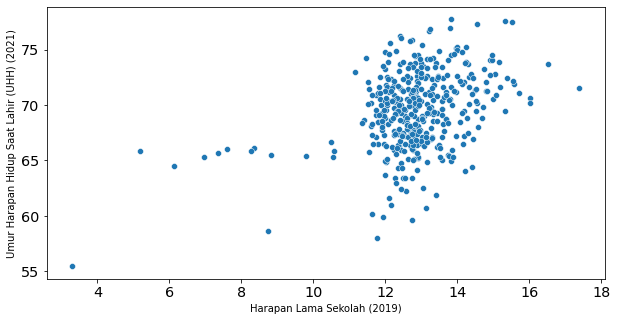

In [ ]:
# Harapan lama sekolah
plt.figure(figsize=(10,5))
sns.scatterplot(x="Harapan Lama Sekolah (2019)",
                y="Umur Harapan Hidup Saat Lahir (UHH) (2021)",
                data=df_train)

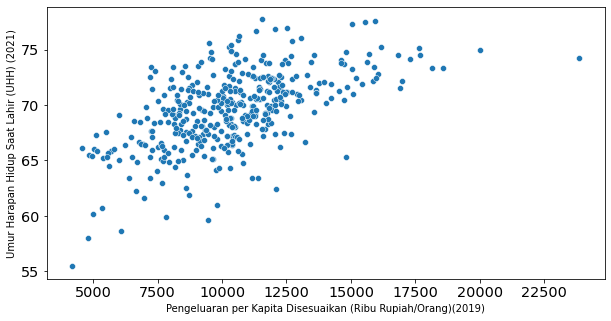

In [ ]:
# Pengeluaran per kapita
plt.figure(figsize=(10,5))
sns.scatterplot(x="Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)",
                y="Umur Harapan Hidup Saat Lahir (UHH) (2021)",
                data=df_train)

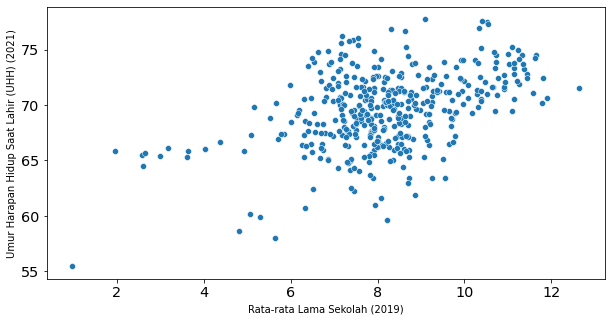

In [ ]:
# Rata rata lama sekolah
plt.figure(figsize=(10,5))
sns.scatterplot(x="Rata-rata Lama Sekolah (2019)",
                y="Umur Harapan Hidup Saat Lahir (UHH) (2021)",
                data=df_train)

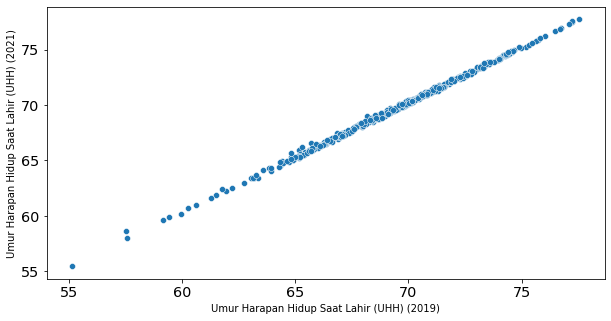

In [ ]:
# UHH
plt.figure(figsize=(10,5))
sns.scatterplot(x="Umur Harapan Hidup Saat Lahir (UHH) (2019)",
                y="Umur Harapan Hidup Saat Lahir (UHH) (2021)",
                data=df_train)

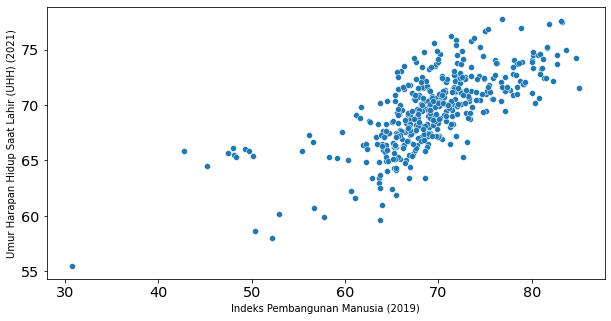

In [ ]:
# Indeks Pembangunan manusia
plt.figure(figsize=(10,5))
sns.scatterplot(x="Indeks Pembangunan Manusia (2019)",
                y="Umur Harapan Hidup Saat Lahir (UHH) (2021)",
                data=df_train)

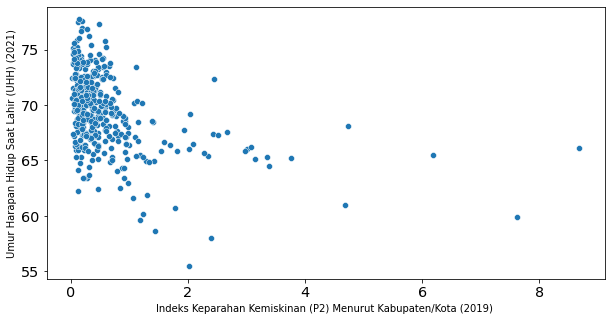

In [ ]:
# Indeks Keparahan Kemiskinan P2
plt.figure(figsize=(10,5))
sns.scatterplot(x="Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ",
                y="Umur Harapan Hidup Saat Lahir (UHH) (2021)",
                data=df_train)

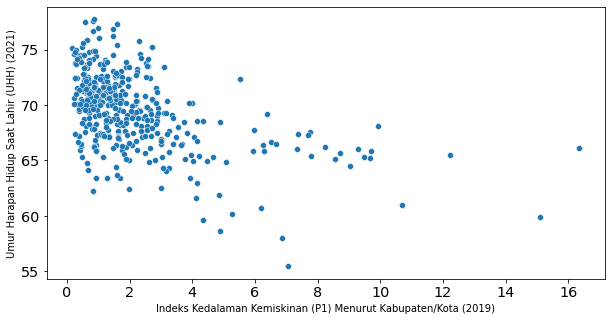

In [ ]:
# Indeks kedalaman Kemiskinan P1
plt.figure(figsize=(10,5))
sns.scatterplot(x="Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)",
                y="Umur Harapan Hidup Saat Lahir (UHH) (2021)",
                data=df_train)

Hasil Pengamatan:

Dari visualisasi data antara variabel target (`Umur Harapan Hidup 2021`) dengan beberapa variabel feature terdapat kalau bentuk penyebaran datanya cukup linear yang mana mungkin model linier regresi bisa digunakan untuk kasus kali ini.

## Multivariate Analysis

### Corelation Heatmap

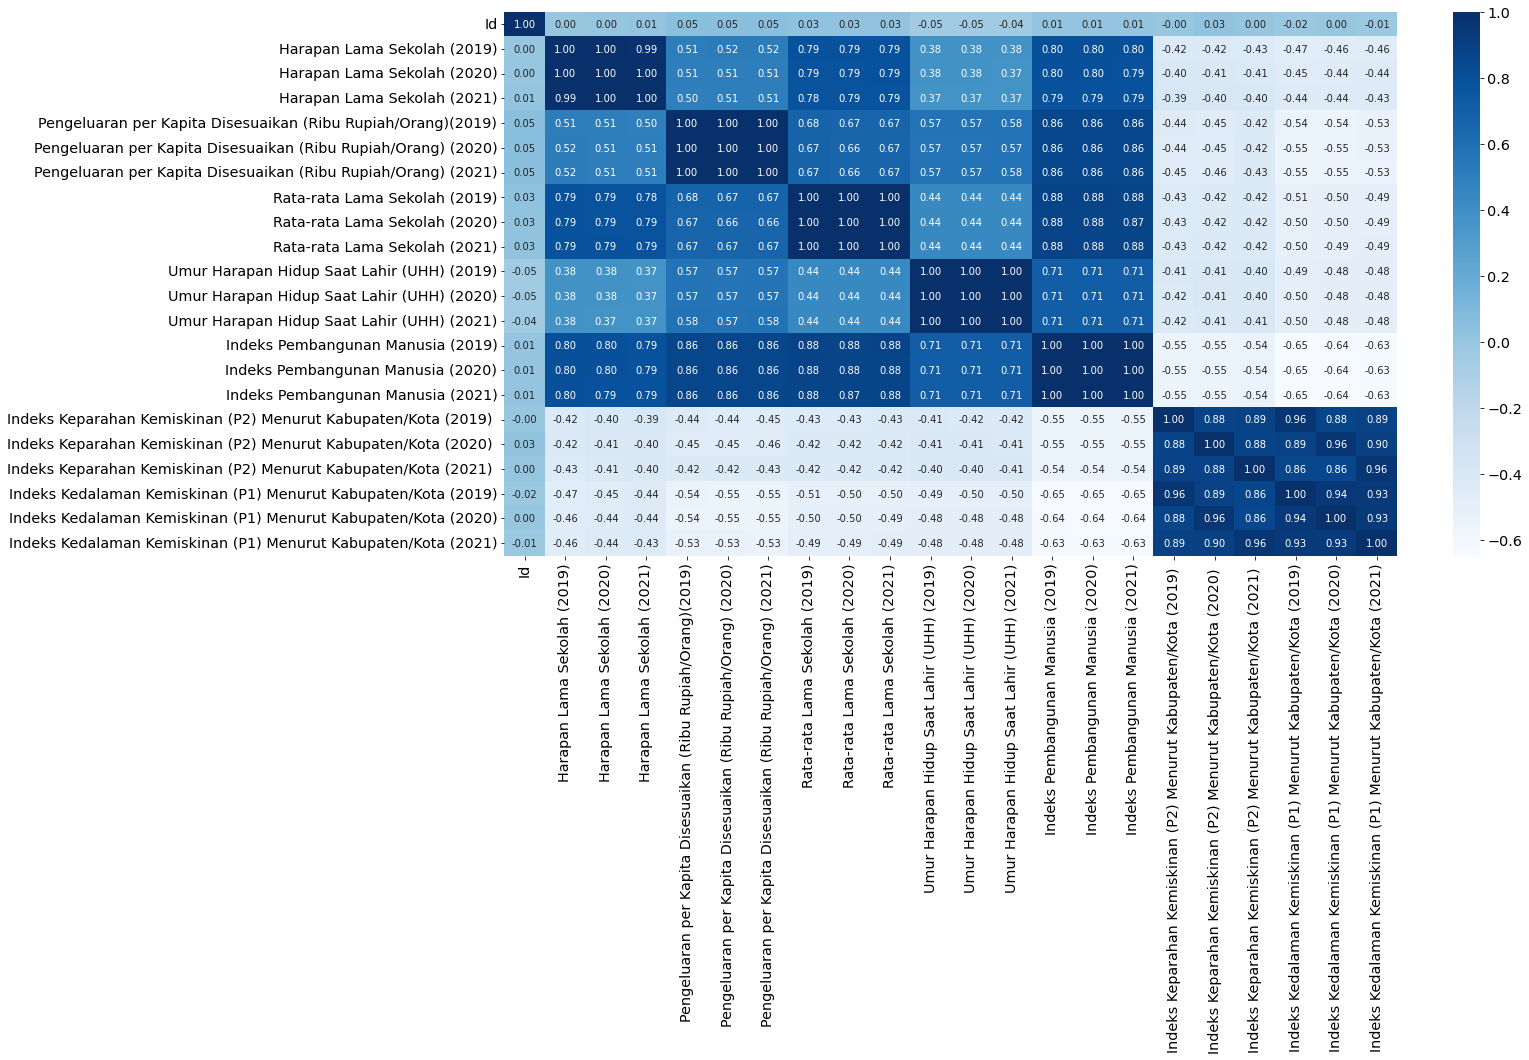

In [ ]:
# korelasi heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr(), cmap='Blues', annot=True, fmt='.2f')

Hasil Pengamatan:
1. Kolom (`Id`) memiliki korelasi yang sangat kecil karena mendekati 0 dan kolom tersebut tidak terlalu penting untuk digunakan proses prediksi maka nantinya kolom (`Id`) bisa dihilangkan.
2. Terdapat banyak data yang memiliki korelasi kuat positif seperti kolom (`Harapan Lama Sekolah`), (`Pengeluaran Per Kapita`), (`Rata Rata Lama Sekolah`), (`Umur Harapan Hidup`), dan (`Indeks Pembangunan Manusia`) yang mana data tersebut bisa digunakan untuk proses prediksi machine learning.
3. Terdapat juga data yang memiliki korelasi lemah negatif seperti kolom (`Indeks Keparahan Kemiskinan`) dan (`Indeks Kedalaman Kemiskinan`) yang mana data tersebut bisa juga dipakai untuk proses prediksi machine learning.

### Category Columns VS Target Variable
Menyelidiki hubungan-hubungan fitur category dengan calon model target (`Umur Harapan Hidup 2021`)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


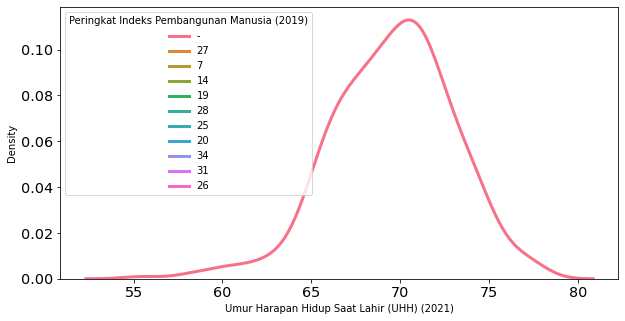

In [ ]:
# UHH dengan Peringkat Indeks Pembangunan Manusia 2019
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_train, x='Umur Harapan Hidup Saat Lahir (UHH) (2021)', hue="Peringkat Indeks Pembangunan Manusia (2019)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


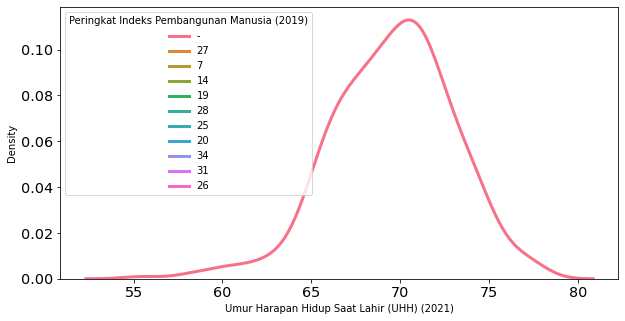

In [ ]:
# UHH dengan Peringkat Indeks Pembangunan Manusia 2020
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_train, x='Umur Harapan Hidup Saat Lahir (UHH) (2021)', hue="Peringkat Indeks Pembangunan Manusia (2019)")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


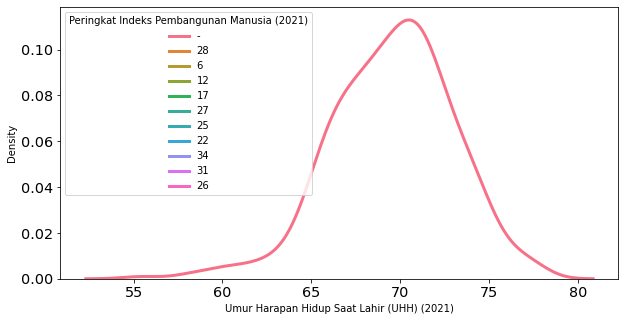

In [ ]:
# UHH dengan Peringkat Indeks Pembangunan Manusia 2019
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_train, x='Umur Harapan Hidup Saat Lahir (UHH) (2021)', hue="Peringkat Indeks Pembangunan Manusia (2021)")

Hasil Pengamatan:
1. Tampaknya hubungan data category "Peringkat Indeks Pembangunan Manusia" dengan target variabel tidak memiliki hubungan yang spesial, kemudian nilai "-" banyak mendominasi di setiap data "Peringkat Indeks Pembangunan Manusia"

## EDA Conclussion dari pengerjaan di atas
1. Terdapat data berbentuk skew positif pada data Indeks kedalaman kemiskinan (P1) sehingga data tersebut bisa kita lakukan log agar distribusinya menjadi normal
2. Terdapat data kabupaten/kota dengan memiliki unique yang besar sekitar 407 sehingga data ini bisa di drop
3. Terdapat data Id yang mana data ini tidak bermakna sehingga dapat dihapus fitur Id tersebut
4. Terdapat juga data Peringkat Indeks Pembangunan bertipe objek dengan nilai unique 11 yang mana nilai unique ini terlalu banyak sehingga dapat dilakukan penghapusan pada data Peringkat Indeks Pembangunan

## Tingkat Pertumbuhan Ekonomi Masyarakat Terdampak Covid 19

In [ ]:
Year = [df_eko[df_eko['Provinsi']=='INDONESIA']['2017'],df_eko[df_eko['Provinsi']=='INDONESIA']['2018'],df_eko[df_eko['Provinsi']=='INDONESIA']['2019'], df_eko[df_eko['Provinsi']=='INDONESIA']['2020'],df_eko[df_eko['Provinsi']=='INDONESIA']['2021']]

Year_Label = ['2017','2018','2019','2020','2021']

Text(0, 0.5, 'Persen')

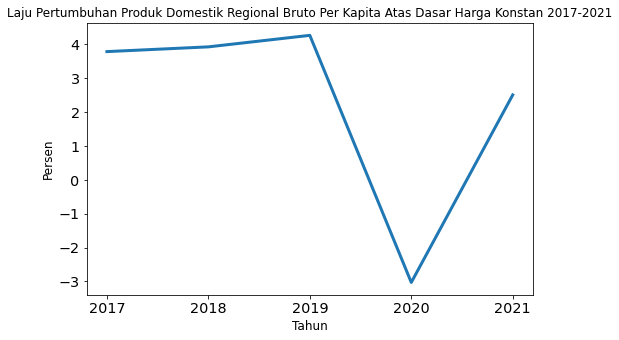

In [ ]:
# single plot in one axes
plt.figure(figsize=(8,5))
plt.plot( Year_Label,Year)
plt.title ("Laju Pertumbuhan Produk Domestik Regional Bruto Per Kapita Atas Dasar Harga Konstan 2017-2021")
plt.xlabel ("Tahun", fontsize = 12)
plt.ylabel ("Persen", fontsize = 12)

###PDRB(Pendapatan Domestik Regional Bruto) Tertinggi 2019

Text(0.5, 1.0, '10 Provinsi dengan Laju Pertumbuhan \nPendapatan Domestik Bruto Regional Tertinggi di Tahun 2019')

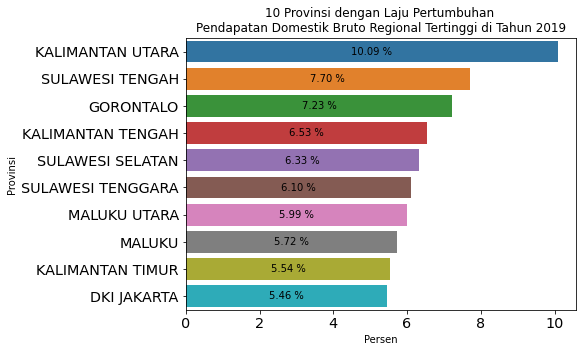

In [ ]:
df_2019 = df_eko[['Provinsi','2019']]
df_2019 = df_2019.sort_values('2019')
df_low10_19 = df_2019.head(3)

df_2019 = df_2019.sort_values('2019',ascending = False)
df_top10_19 = df_2019.head(10)

plt.figure(figsize=(7,5))

ax = sns.barplot(x='2019', y='Provinsi', data=df_top10_19)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.set_xlabel("Persen")
ax.set_title('10 Provinsi dengan Laju Pertumbuhan \nPendapatan Domestik Bruto Regional Tertinggi di Tahun 2019')

Text(0.5, 1.0, '3 Provinsi dengan Laju Pertumbuhan Negatif \nPendapatan Domestik Bruto Regional Tertinggi di Tahun 2019')

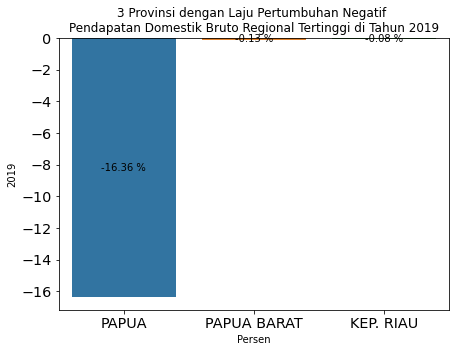

In [ ]:
plt.figure(figsize=(7,5))

ax = sns.barplot(x='Provinsi', y='2019', data=df_low10_19)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.set_xlabel("Persen")
ax.set_title('3 Provinsi dengan Laju Pertumbuhan Negatif \nPendapatan Domestik Bruto Regional Tertinggi di Tahun 2019')

PDRB 2020

In [ ]:
df_eko_2020 = df_eko[['Provinsi','2020']]
df_eko_2020 = df_eko_2020.sort_values('2020')
df_eko_2020

,Provinsi,2020
33,PAPUA,-20.13
32,PAPUA BARAT,-15.42
19,KALIMANTAN BARAT,-8.26
16,BALI,-8.25
12,JAWA TENGAH,-7.71
7,LAMPUNG,-7.44
22,KALIMANTAN TIMUR,-6.40
29,SULAWESI BARAT,-6.25
24,SULAWESI UTARA,-5.65
30,MALUKU,-4.95


###PDRB Tertinggi 2021

Text(0.5, 1.0, '10 Provinsi dengan Laju Pertumbuhan \nPendapatan Domestik Bruto Regional Tertinggi di Tahun 2021')

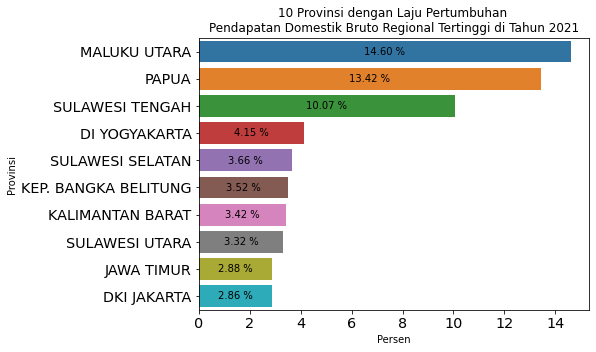

In [ ]:
df_2021 = df_eko[['Provinsi','2021']]
df_2021 = df_2021.sort_values('2021')
df_low10_21 = df_2021.head(5)

df_2021 = df_2021.sort_values('2021',ascending = False)
df_top10_21 = df_2021.head(10)

plt.figure(figsize=(7,5))

ax = sns.barplot(x='2021', y='Provinsi', data=df_top10_21)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.set_xlabel("Persen")
ax.set_title('10 Provinsi dengan Laju Pertumbuhan \nPendapatan Domestik Bruto Regional Tertinggi di Tahun 2021')

Text(0.5, 1.0, '5 Provinsi dengan Laju Pertumbuhan  \nPendapatan Domestik Bruto Regional Terendah di Tahun 2021')

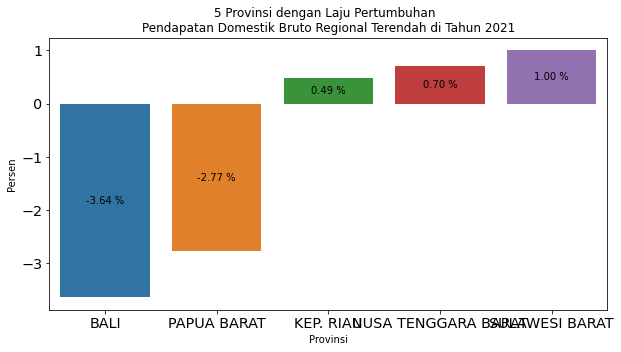

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Provinsi', y='2021', data=df_low10_21)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.2f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.set_ylabel("Persen")
ax.set_xlabel("Provinsi")
ax.set_title('5 Provinsi dengan Laju Pertumbuhan  \nPendapatan Domestik Bruto Regional Terendah di Tahun 2021')

##Perkembangan Umur Harapan Hidup di masyarakat Indonesia pada masa Covid

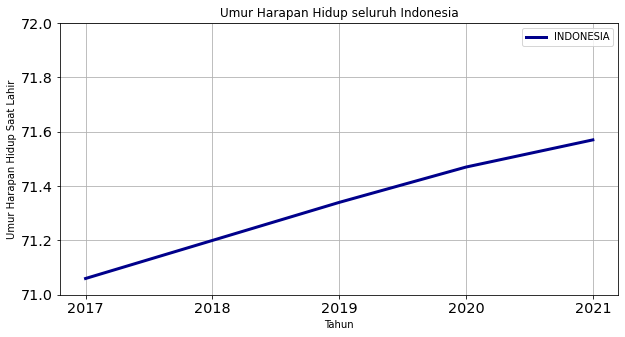

In [ ]:
df_graph = df_uhh_t.head(5)
ax = df_graph.plot.line(x='Tahun',y='INDONESIA',xticks = df_graph['Tahun'],figsize = (10,5),color = 'darkblue')
ax.set_ylabel("Umur Harapan Hidup Saat Lahir")
ax.set_title("Umur Harapan Hidup seluruh Indonesia")
ax.set_ylim(71,72)
ax.grid(True)

###Top 10 Provinsi/Kabupaten/Kota dengan UHH Tertinggi dan Terendah di 2019

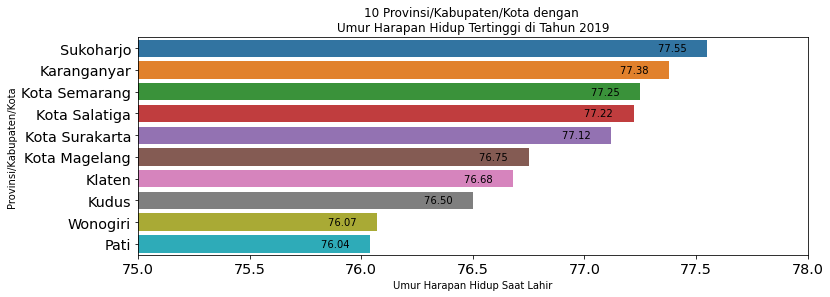

<Figure size 504x360 with 0 Axes>

In [ ]:
df_2019 = df_uhh[['Provinsi/Kabupaten/Kota','2019']]
df_2019 = df_2019.sort_values('2019')
df_low10_19 = df_2019.head(10)

df_2019 = df_2019.sort_values('2019',ascending = False)
df_top10_19 = df_2019.head(10)



ax = sns.barplot(x='2019', y='Provinsi/Kabupaten/Kota', data=df_top10_19)
ax.set_xlabel("Umur Harapan Hidup Saat Lahir")
ax.set_xlim(75,78)
ax.set_title('10 Provinsi/Kabupaten/Kota dengan \nUmur Harapan Hidup Tertinggi di Tahun 2019')

plt.figure(figsize=(7,5))
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width - 0.15, 
            y+height/2, 
            '{:.2f} '.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')


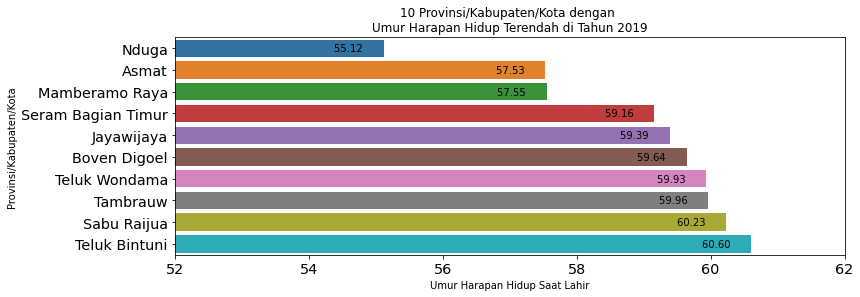

In [ ]:
ax2 = sns.barplot(x='2019', y='Provinsi/Kabupaten/Kota', data=df_low10_19)
ax2.set_xlabel("Umur Harapan Hidup Saat Lahir")
ax2.set_xlim(52,62)
ax2.set_title('10 Provinsi/Kabupaten/Kota dengan \nUmur Harapan Hidup Terendah di Tahun 2019')
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax2.text(x+width-0.5, 
            y+height/2, 
            '{:.2f} '.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')

###Top 10 Provinsi/Kabupaten/Kota dengan UHH Tertinggi dan Terendah di 2020

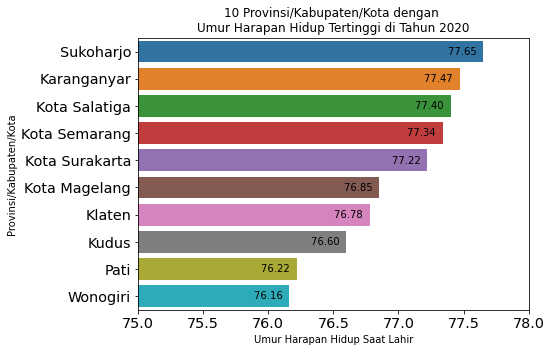

In [ ]:
df_2020 = df_uhh[['Provinsi/Kabupaten/Kota','2020']]
df_2020 = df_2020.sort_values('2020')
df_low10_20 = df_2020.head(10)

df_2020 = df_2020.sort_values('2020',ascending = False)
df_top10_20 = df_2020.head(10)

plt.figure(figsize=(7,5))

ax = sns.barplot(x='2020', y='Provinsi/Kabupaten/Kota', data=df_top10_20)
ax.set_xlabel("Umur Harapan Hidup Saat Lahir")
ax.set_xlim(75,78)
ax.set_title('10 Provinsi/Kabupaten/Kota dengan \nUmur Harapan Hidup Tertinggi di Tahun 2020')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width - 0.15, 
            y+height/2, 
            '{:.2f} '.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')

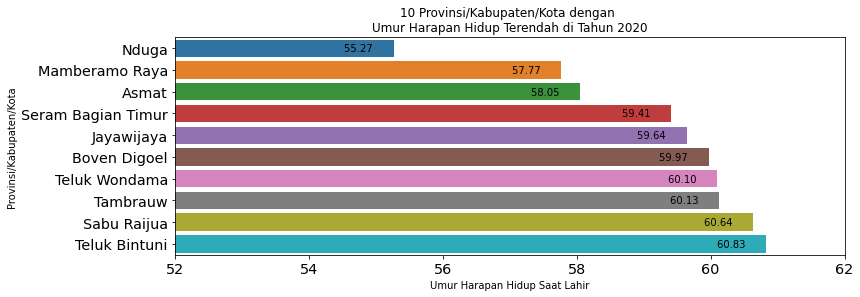

In [ ]:
ax = sns.barplot(x='2020', y='Provinsi/Kabupaten/Kota', data=df_low10_20)
ax.set_xlabel("Umur Harapan Hidup Saat Lahir")
ax.set_xlim(52,62)
ax.set_title('10 Provinsi/Kabupaten/Kota dengan \nUmur Harapan Hidup Terendah di Tahun 2020')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width - 0.5, 
            y+height/2, 
            '{:.2f} '.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')

###Top 10 Provinsi/Kabupaten/Kota dengan UHH Tertinggi dan Terendah di 2021

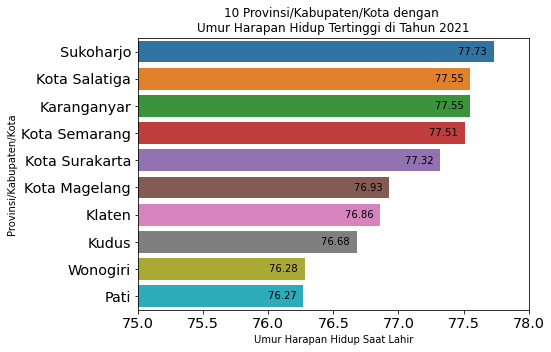

In [ ]:
df_2021 = df_uhh[['Provinsi/Kabupaten/Kota','2021']]
df_2021 = df_2021.sort_values('2021')
df_low10_21 = df_2021.head(10)

df_2021 = df_2021.sort_values('2021',ascending = False)
df_top10_21 = df_2021.head(10)

plt.figure(figsize=(7,5))

ax = sns.barplot(x='2021', y='Provinsi/Kabupaten/Kota', data=df_top10_21)
ax.set_xlabel("Umur Harapan Hidup Saat Lahir")
ax.set_xlim(75,78)
ax.set_title('10 Provinsi/Kabupaten/Kota dengan \nUmur Harapan Hidup Tertinggi di Tahun 2021')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width - 0.15, 
            y+height/2, 
            '{:.2f} '.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')

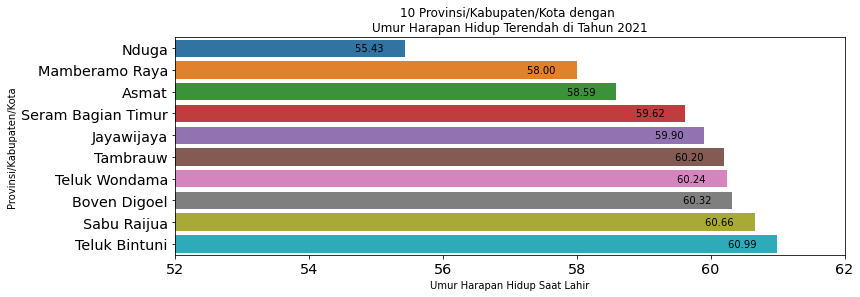

In [ ]:
ax = sns.barplot(x='2021', y='Provinsi/Kabupaten/Kota', data=df_low10_21)
ax.set_xlabel("Umur Harapan Hidup Saat Lahir")
ax.set_xlim(52,62)
ax.set_title('10 Provinsi/Kabupaten/Kota dengan \nUmur Harapan Hidup Terendah di Tahun 2021')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width - 0.5, 
            y+height/2, 
            '{:.2f} '.format(width), 
            horizontalalignment='center', 
            verticalalignment='center')

## UMKM yang dapat disupport pemerintah

In [ ]:
df_umkm.head()

,UMKM,2018,2019,2020
0,"Pertanian, Perburuan dan Kehutanan",89560.0,109544.0,130012.0
1,Perikanan,7200.0,9379.0,11416.0
2,Pertambangan dan Penggalian,6608.0,8544.0,8039.0
3,Industri Pengolahan,99028.0,111401.0,112601.0
4,"Listrik, gas dan air",4307.0,6669.0,4039.0


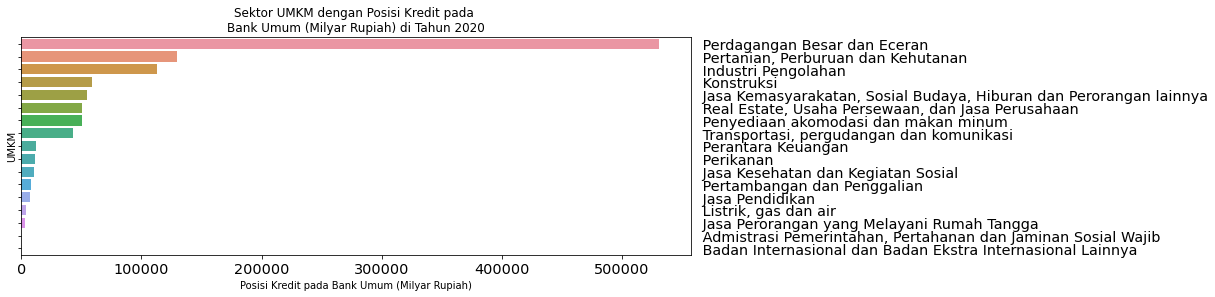

In [ ]:
df_umkm_2020 = df_umkm[['UMKM','2020']]
df_umkm_2020 = df_umkm_2020.sort_values('2020',ascending = False)
df_umkm_low_2020 = df_umkm_2020.head(10)

ax = sns.barplot(x='2020', y='UMKM', data=df_umkm_2020)
ax.set_xlabel("Posisi Kredit pada Bank Umum (Milyar Rupiah)")
ax.set_title('Sektor UMKM dengan Posisi Kredit pada \nBank Umum (Milyar Rupiah) di Tahun 2020')
ax.tick_params(axis='y', which='both', labelleft=False, labelright=True)

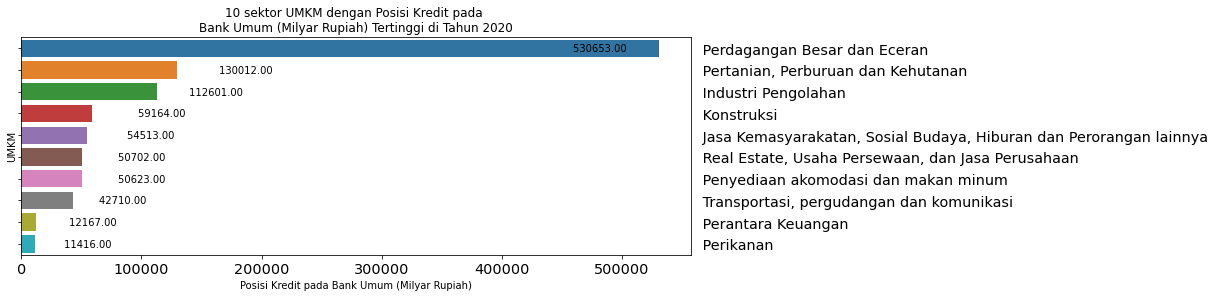

<Figure size 504x360 with 0 Axes>

In [ ]:
df_umkm_2020 = df_umkm_2020.sort_values('2020',ascending = False)

df_umkm_high_2020 = df_umkm_2020.head(10)

ax = sns.barplot(x='2020', y='UMKM', data=df_umkm_high_2020)
ax.set_xlabel("Posisi Kredit pada Bank Umum (Milyar Rupiah)")
ax.set_title('10 sektor UMKM dengan Posisi Kredit pada \nBank Umum (Milyar Rupiah) Tertinggi di Tahun 2020')


ax.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.figure(figsize=(7,5))
i = 0

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if i == 0:
        ax.text(x+width/1.1, 
                y+height/2, 
                '{:.2f} '.format(width), 
                horizontalalignment='center', 
               verticalalignment='center')
    elif i<3:
        ax.text(x+width*1.45, 
                y+height/2, 
                '{:.2f} '.format(width), 
                horizontalalignment='center', 
               verticalalignment='center')
    elif i>7:
        ax.text(x+width*5, 
                y+height/2, 
                '{:.2f} '.format(width), 
                horizontalalignment='center', 
               verticalalignment='center')
    else:
        ax.text(x+width*2, 
                y+height/2, 
                '{:.2f} '.format(width), 
                horizontalalignment='center', 
               verticalalignment='center')
    i+=1

## Tingkat Kemiskinan masyarakat **terdampak** Covid

Menggunakan data Indeks Kedalaman Kemiskinan dari tahun 2017 - 2019

In [ ]:
df_ikkp1_2017_2021.head()

,Nama Wilayah,2017,2018,2019,2020,2021
0,ACEH,2.98,2.84,2.64,2.72,2.86
1,Simeulue,2.78,3.11,3.05,2.21,2.37
2,Aceh Singkil,5.94,4.85,3.83,3.55,3.67
3,Aceh Selatan,2.44,1.78,1.58,2.13,1.69
4,Aceh Tenggara,1.80,2.23,2.37,1.62,2.51


In [ ]:
# rata - rata kemiskinan tiap tahun
mean_ikkp1_2017 = np.round(df_ikkp1_2017_2021['2017'].mean(), 2)
mean_ikkp1_2018 = np.round(df_ikkp1_2017_2021['2018'].mean(), 2)
mean_ikkp1_2019 = np.round(df_ikkp1_2017_2021['2019'].mean(), 2)
mean_ikkp1_2020 = np.round(df_ikkp1_2017_2021['2020'].mean(), 2)
mean_ikkp1_2021 = np.round(df_ikkp1_2017_2021['2021'].mean(), 2)

In [ ]:
data_IKPP1_mean = {'Tahun': [2017, 2018, 2019, 2020, 2021],
                   'IKPP1': [mean_ikkp1_2017, mean_ikkp1_2018, mean_ikkp1_2019, mean_ikkp1_2020, mean_ikkp1_2021]}

df_IKKP1_mean = pd.DataFrame(data_IKPP1_mean)
df_IKKP1_mean

,Tahun,IKPP1
0,2017,2.29
1,2018,2.14
2,2019,2.04
3,2020,2.00
4,2021,2.07


([<matplotlib.axis.XTick at 0x7f59831d7810>,
 <a list of 5 Text major ticklabel objects>)

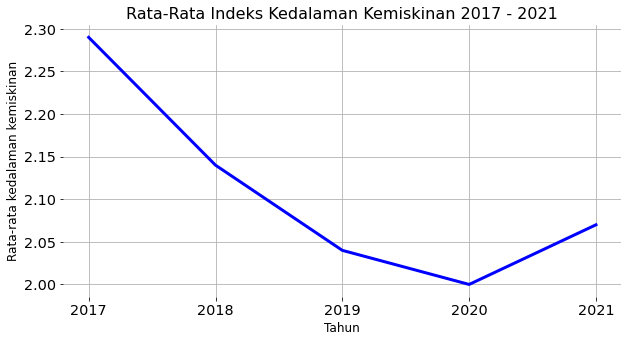

In [ ]:
plt.figure(figsize = (10, 5))
sns.lineplot(x="Tahun", y="IKPP1", color ='blue', data=df_IKKP1_mean)
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title('Rata-Rata Indeks Kedalaman Kemiskinan 2017 - 2021', fontsize = 16);
plt.ylabel("Rata-rata kedalaman kemiskinan", fontsize = 12)
plt.xlabel("Tahun", fontsize = 12)
plt.grid()
plt.xticks(range(2017,2022,1))

Hasil Pengamatan:

Terlihat dari tahun 2017 hingga tahun 2019 rata - rata indeks kedalaman kemiskinan mengalami penurunan namun di tahun 2020 - 2021 rata - rata indeks kedalaman kemiskinan mulai meningkat. Tahun 2020 covid sudah menyebar di indonesia yang mana dikarenakan serangan covid rata - rata indeks kemiskinan mulai meningkat

### Top 10 Kabupaten/Kota dengan indeks kedalaman kemiskinan tertinggi di tahun 2020:

In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

Text(0.5, 0, 'Indeks kedalaman kemiskinan')

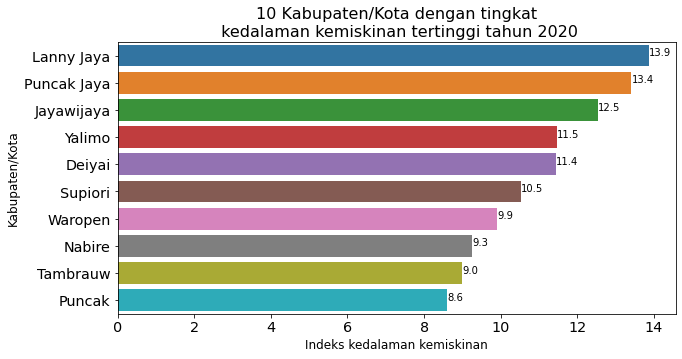

In [ ]:
# top 10
df_ikkp1_kab_kota_2020 = df_train[['Kabupaten/Kota', 'Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)']]
df_ikkp1_kab_kota_2020 = df_ikkp1_kab_kota_2020.sort_values('Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)', ascending=False)
df_ikkp1_kab_kota_2020_top10 = df_ikkp1_kab_kota_2020.head(10)


plt.figure(figsize=(10,5))
p = sns.barplot(x="Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)", y="Kabupaten/Kota", data=df_ikkp1_kab_kota_2020_top10, ci=None)

#show values on barplot
show_values(p, "h", space=0)
plt.title('10 Kabupaten/Kota dengan tingkat\n kedalaman kemiskinan tertinggi tahun 2020', fontsize = 16);
plt.ylabel("Kabupaten/Kota", fontsize = 12)
plt.xlabel("Indeks kedalaman kemiskinan", fontsize = 12)

### Top 10 Kabupaten/Kota dengan Indeks Kedalaman Kemiskinan tertinggi di tahun 2021

Text(0.5, 0, 'Indeks kedalaman kemiskinan')

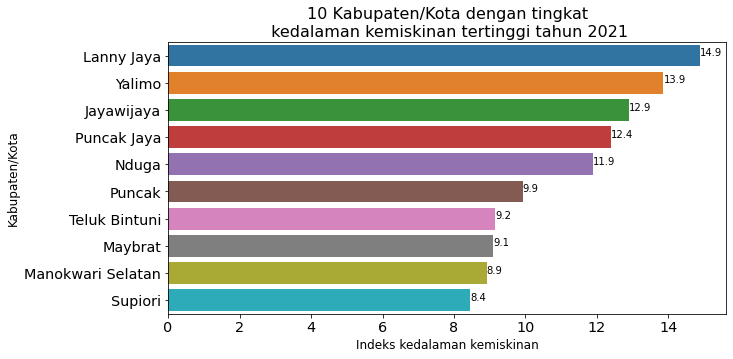

In [ ]:
# top 10
df_ikkp1_kab_kota_2021 = df_train[['Kabupaten/Kota', 'Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)']]
df_ikkp1_kab_kota_2021 = df_ikkp1_kab_kota_2021.sort_values('Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)', ascending=False)
df_ikkp1_kab_kota_2021_top10 = df_ikkp1_kab_kota_2021.head(10)

plt.figure(figsize=(10,5))
p = sns.barplot(x="Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)", y="Kabupaten/Kota", data=df_ikkp1_kab_kota_2021_top10, ci=None)

#show values on barplot
show_values(p, "h", space=0)
plt.title('10 Kabupaten/Kota dengan tingkat\n kedalaman kemiskinan tertinggi tahun 2021', fontsize = 16);
plt.ylabel("Kabupaten/Kota", fontsize = 12)
plt.xlabel("Indeks kedalaman kemiskinan", fontsize = 12)

Hasil Pengamatan:

Dari kedua visualisasi tersebut di dapatkan kalau kota/kabupaten dari provinsi Papua memiliki tingkat kedalaman kemiskinan yang tinggi dari tahun 2020 - 2021

# Preprocessing & Modelling

## Read Data

In [34]:
df_train = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Data_Train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Data_Test.csv')

## Cuplikan Data

In [35]:
df_train.head()

,Id,Kabupaten/Kota,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,1,Buton Tengah,12.70,13.00,13.12,7264,7221,7244,7.29,7.30,7.31,67.50,67.66,67.69,64.06,64.37,64.55,-,-,-,0.34,0.38,0.38,1.64,1.91,2.14
1,2,Kuantan Singingi,13.32,13.33,13.34,10820,10243,10309,8.58,8.59,8.75,68.44,68.55,68.60,70.78,70.31,70.60,-,-,-,0.32,0.32,0.23,1.28,1.44,1.14
2,3,Lombok Utara,12.71,12.72,12.76,9279,9006,9057,5.84,5.91,6.04,66.92,67.17,67.36,64.49,64.42,64.77,-,-,-,2.42,2.58,1.66,7.39,7.09,5.69
3,5,Buol,13.08,13.09,13.10,8151,7942,7974,8.75,8.86,9.08,68.17,68.76,69.05,67.69,67.82,68.25,-,-,-,0.78,0.47,0.51,2.89,1.97,2.01
4,8,Kota Tebing Tinggi,12.71,12.72,12.73,12895,12876,12939,10.28,10.31,10.44,70.76,70.87,70.95,75.08,75.17,75.42,-,-,-,0.31,0.56,0.28,1.47,1.74,1.37


## Drop kolom Id dan Kabupaten/Kota

In [36]:
df_train.drop(columns=["Id", "Kabupaten/Kota"], inplace=True)

## Duplicated Data

In [37]:
# cek data duplikat
df_train.duplicated().sum()

0

## Fungsi Evaluation Regression

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_regression(model, pred, xtrain, ytrain, xtest, ytest):
    print("MAE: %.5f" % mean_absolute_error(ytest, pred)) # The MAE
    print("RMSE: %.5f" % mean_squared_error(ytest, pred, squared=False)) # The RMSE
    print('R2 score: %.5f' % r2_score(ytest, pred)) # Explained variance score: 1 is perfect prediction

## Percobaan Linear Regression

### Feature Importance Regression

Feature: 0, Score: -0.02811
Feature: 1, Score: 0.65670
Feature: 2, Score: -0.61736
Feature: 3, Score: 0.00004
Feature: 4, Score: 0.00045
Feature: 5, Score: -0.00049
Feature: 6, Score: 0.06220
Feature: 7, Score: 0.70262
Feature: 8, Score: -0.76766
Feature: 9, Score: -0.33577
Feature: 10, Score: 1.33340
Feature: 11, Score: -0.01602
Feature: 12, Score: -0.58832
Feature: 13, Score: 0.60294
Feature: 14, Score: 0.06872
Feature: 15, Score: 0.03243
Feature: 16, Score: -0.11947
Feature: 17, Score: -0.03181
Feature: 18, Score: -0.01321
Feature: 19, Score: 0.05451


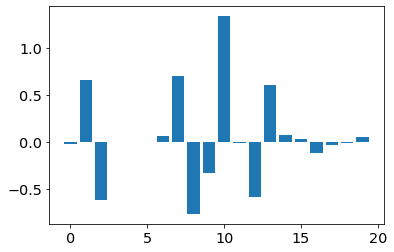

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

df_train_feature_selection_lr = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                                       'Peringkat Indeks Pembangunan Manusia (2020)',
                                                       'Peringkat Indeks Pembangunan Manusia (2021)',])
  
X = df_train_feature_selection_lr.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_feature_selection_lr["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)


#Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
importance = regressor.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 353 to 215
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Harapan Lama Sekolah (2019)                                      345 non-null    float64
 1   Harapan Lama Sekolah (2020)                                      345 non-null    float64
 2   Harapan Lama Sekolah (2021)                                      345 non-null    float64
 3   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)     345 non-null    int64  
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)    345 non-null    int64  
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)    345 non-null    int64  
 6   Rata-rata Lama Sekolah (2019)                                    345 non-null    float64
 7   Rata-rata Lama Sekolah (2020)             

In [ ]:
X_train.columns

Index(['Harapan Lama Sekolah (2019)', 'Harapan Lama Sekolah (2020)',
       'Harapan Lama Sekolah (2021)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)',
       'Rata-rata Lama Sekolah (2019)', 'Rata-rata Lama Sekolah (2020)',
       'Rata-rata Lama Sekolah (2021)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2019)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2020)',
       'Indeks Pembangunan Manusia (2019)',
       'Indeks Pembangunan Manusia (2020)',
       'Indeks Pembangunan Manusia (2021)',
       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) ',
       'Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)',
       'Indeks Kedalaman Kemiski

In [ ]:
df_train_feature_selection_lr.drop(columns=[
                       'Harapan Lama Sekolah (2019)',
                        'Harapan Lama Sekolah (2021)',
                        'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)',
                        'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
                        'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)',
                       'Rata-rata Lama Sekolah (2019)',
                       'Rata-rata Lama Sekolah (2021)',
                       'Umur Harapan Hidup Saat Lahir (UHH) (2019)',
                       'Indeks Pembangunan Manusia (2019)',
                       'Indeks Pembangunan Manusia (2020)',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) ',
                       'Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)',
                       'Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)'], inplace=True)
  
X = df_train_feature_selection_lr.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_feature_selection_lr["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

eval_regression(regressor, pred, X_train, y_train, X_test, y_test)

MAE: 0.05394
RMSE: 0.06583
R2 score: 0.99960


In [ ]:
pred_train = regressor.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9996067224760516
RMSE score:  0.06844991596149234


### Percobaan 1 tanpa menggunakan feature peringkat indeks pembangunan manusia 2019 - 2021 dengan standarisasi

In [ ]:
df_train_feature_lr1 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                              'Peringkat Indeks Pembangunan Manusia (2020)',
                                              'Peringkat Indeks Pembangunan Manusia (2021)',])
  
X = df_train_feature_lr1.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_feature_lr1["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

eval_regression(regressor, pred, X_train, y_train, X_test, y_test)

MAE: 0.24474
RMSE: 0.27808
R2 score: 0.99285


In [ ]:
pred_train = regressor.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9998204034800149
RMSE score:  0.046256451604068126


### Percobaan 2 tanpa menggunakan feature peringkat indeks pembangunan manusia 2019 - 2021 dan indeks keparahan kemiskinan 2019 - 2021

In [ ]:
df_train_feature_lr2 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                              'Peringkat Indeks Pembangunan Manusia (2020)',
                                              'Peringkat Indeks Pembangunan Manusia (2021)',
                                              'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                                              'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                                              'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '])
  
X = df_train_feature_lr2.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_feature_lr2["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

eval_regression(regressor, pred, X_train, y_train, X_test, y_test)

MAE: 0.03179
RMSE: 0.03935
R2 score: 0.99986


In [ ]:
pred_train = regressor.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9998114023094551
RMSE score:  0.04740144062653099


### Percobaan ke 3 Melakukan Log pada data Indeks Kedalaman Kemiskinan (P1), menghilangkan feature peringkat indeks pembangunan manusia 2019 - 2021 dan indeks keparahan kemiskinan 2019 - 2021 dan tidak melakukan proses standarisasi

In [9]:
df_train_with_log = df_train.copy()

In [10]:
df_train_with_log.describe()

,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,12.835651,12.900295,12.963661,10350.257985,10165.857494,10232.029484,8.186511,8.310418,8.405946,69.279066,69.430516,69.535799,69.285553,69.384521,69.680541,0.587224,0.561106,0.585749,2.112727,2.061499,2.121278
std,1.363455,1.350578,1.338904,2665.411454,2649.712849,2671.995442,1.663764,1.650030,1.647457,3.475954,3.448321,3.432372,6.621864,6.593220,6.571755,0.888473,0.817328,0.863150,2.141924,2.050201,2.002196
min,3.290000,3.610000,3.870000,4181.000000,3975.000000,3976.000000,0.970000,1.130000,1.420000,55.120000,55.270000,55.430000,30.750000,31.550000,32.840000,0.020000,0.000000,0.030000,0.160000,0.070000,0.190000
25%,12.285000,12.350000,12.410000,8598.500000,8456.000000,8539.500000,7.285000,7.435000,7.510000,67.005000,67.170000,67.255000,66.170000,66.210000,66.475000,0.170000,0.180000,0.200000,0.840000,0.875000,0.940000
50%,12.810000,12.850000,12.910000,10298.000000,10121.000000,10198.000000,8.100000,8.240000,8.300000,69.570000,69.750000,69.780000,69.040000,69.180000,69.530000,0.340000,0.330000,0.360000,1.520000,1.470000,1.590000
75%,13.455000,13.490000,13.595000,11763.000000,11549.000000,11671.000000,9.110000,9.270000,9.335000,71.560000,71.630000,71.745000,72.535000,72.660000,72.955000,0.610000,0.600000,0.635000,2.535000,2.345000,2.520000
max,17.390000,17.790000,17.800000,23851.000000,23575.000000,23888.000000,12.640000,12.650000,12.830000,77.550000,77.650000,77.730000,85.070000,85.410000,85.710000,8.680000,6.990000,8.120000,16.350000,13.870000,14.870000


In [11]:
df_train_with_log.columns

Index(['Harapan Lama Sekolah (2019)', 'Harapan Lama Sekolah (2020)',
       'Harapan Lama Sekolah (2021)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)',
       'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)',
       'Rata-rata Lama Sekolah (2019)', 'Rata-rata Lama Sekolah (2020)',
       'Rata-rata Lama Sekolah (2021)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2019)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2020)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2021)',
       'Indeks Pembangunan Manusia (2019)',
       'Indeks Pembangunan Manusia (2020)',
       'Indeks Pembangunan Manusia (2021)',
       'Peringkat Indeks Pembangunan Manusia (2019)',
       'Peringkat Indeks Pembangunan Manusia (2020)',
       'Peringkat Indeks Pembangunan Manusia (2021)',
       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
       'Indeks Keparahan Kemiskinan (P

In [12]:
df_train_with_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)'] = np.log(df_train_with_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)'])
df_train_with_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)'] = np.log(df_train_with_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)'])
df_train_with_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)'] = np.log(df_train_with_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)'])


In [13]:
df_train_with_log.describe()

,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Umur Harapan Hidup Saat Lahir (UHH) (2021),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,12.835651,12.900295,12.963661,10350.257985,10165.857494,10232.029484,8.186511,8.310418,8.405946,69.279066,69.430516,69.535799,69.285553,69.384521,69.680541,0.587224,0.561106,0.585749,0.393947,0.390101,0.455493
std,1.363455,1.350578,1.338904,2665.411454,2649.712849,2671.995442,1.663764,1.650030,1.647457,3.475954,3.448321,3.432372,6.621864,6.593220,6.571755,0.888473,0.817328,0.863150,0.827410,0.800550,0.752178
min,3.290000,3.610000,3.870000,4181.000000,3975.000000,3976.000000,0.970000,1.130000,1.420000,55.120000,55.270000,55.430000,30.750000,31.550000,32.840000,0.020000,0.000000,0.030000,-1.832581,-2.659260,-1.660731
25%,12.285000,12.350000,12.410000,8598.500000,8456.000000,8539.500000,7.285000,7.435000,7.510000,67.005000,67.170000,67.255000,66.170000,66.210000,66.475000,0.170000,0.180000,0.200000,-0.174353,-0.133548,-0.061875
50%,12.810000,12.850000,12.910000,10298.000000,10121.000000,10198.000000,8.100000,8.240000,8.300000,69.570000,69.750000,69.780000,69.040000,69.180000,69.530000,0.340000,0.330000,0.360000,0.418710,0.385262,0.463734
75%,13.455000,13.490000,13.595000,11763.000000,11549.000000,11671.000000,9.110000,9.270000,9.335000,71.560000,71.630000,71.745000,72.535000,72.660000,72.955000,0.610000,0.600000,0.635000,0.930192,0.852265,0.924259
max,17.390000,17.790000,17.800000,23851.000000,23575.000000,23888.000000,12.640000,12.650000,12.830000,77.550000,77.650000,77.730000,85.070000,85.410000,85.710000,8.680000,6.990000,8.120000,2.794228,2.629728,2.699346


In [14]:
df_train_feature_log = df_train_with_log.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                              'Peringkat Indeks Pembangunan Manusia (2020)',
                                              'Peringkat Indeks Pembangunan Manusia (2021)',
                                              'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                                              'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                                              'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '])
  
X = df_train_feature_log.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_feature_log["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [15]:
#Linear regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

eval_regression(regressor, pred, X_train, y_train, X_test, y_test)

MAE: 0.03236
RMSE: 0.04011
R2 score: 0.99985


In [16]:
pred_train = regressor.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9998103959117124
RMSE score:  0.04752774448347576


In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 353 to 215
Data columns (total 17 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Harapan Lama Sekolah (2019)                                     345 non-null    float64
 1   Harapan Lama Sekolah (2020)                                     345 non-null    float64
 2   Harapan Lama Sekolah (2021)                                     345 non-null    float64
 3   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019)    345 non-null    int64  
 4   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020)   345 non-null    int64  
 5   Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021)   345 non-null    int64  
 6   Rata-rata Lama Sekolah (2019)                                   345 non-null    float64
 7   Rata-rata Lama Sekolah (2020)                      

In [18]:
df_testing_log = df_test.copy()
df_testing_log.head()

,Id,Harapan Lama Sekolah (2019),Harapan Lama Sekolah (2020),Harapan Lama Sekolah (2021),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang)(2019),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2020),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang) (2021),Rata-rata Lama Sekolah (2019),Rata-rata Lama Sekolah (2020),Rata-rata Lama Sekolah (2021),Umur Harapan Hidup Saat Lahir (UHH) (2019),Umur Harapan Hidup Saat Lahir (UHH) (2020),Indeks Pembangunan Manusia (2019),Indeks Pembangunan Manusia (2020),Indeks Pembangunan Manusia (2021),Peringkat Indeks Pembangunan Manusia (2019),Peringkat Indeks Pembangunan Manusia (2020),Peringkat Indeks Pembangunan Manusia (2021),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020),Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020),Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)
0,0,12.33,12.39,12.65,7913,7801,7758,6.82,7.03,7.04,70.90,71.04,65.50,65.74,66.03,-,-,-,0.17,0.05,0.11,0.80,0.41,0.52
1,4,12.08,12.37,12.38,8760,8739,8790,4.55,4.85,4.86,67.96,68.03,61.94,62.70,62.80,-,-,-,0.70,0.53,0.80,3.20,2.93,3.66
2,6,15.41,15.51,15.75,16666,16593,16663,10.17,10.18,10.41,73.15,73.27,81.32,81.45,82.04,-,-,-,0.13,0.15,0.22,0.55,0.66,0.87
3,7,15.00,15.01,15.02,15176,14763,14937,11.55,11.56,11.57,70.38,70.45,80.16,79.94,80.11,-,-,-,0.76,0.55,0.79,2.27,1.98,2.53
4,14,11.76,11.81,12.10,13070,12909,12945,7.13,7.19,7.20,71.16,71.36,70.33,70.45,70.89,-,-,-,0.10,0.14,0.11,0.52,0.72,0.63


Prediksi data dengan data testing dari csv

In [19]:
id_df_testing = df_testing_log["Id"]
df_testing_log.drop(columns=['Id',
                       'Peringkat Indeks Pembangunan Manusia (2019)',
                       'Peringkat Indeks Pembangunan Manusia (2020)',
                       'Peringkat Indeks Pembangunan Manusia (2021)',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '], inplace=True)

df_testing_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)'] = np.log(df_testing_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2019)'])
df_testing_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)'] = np.log(df_testing_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2020)'])
df_testing_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)'] = np.log(df_testing_log['Indeks Kedalaman Kemiskinan (P1) Menurut Kabupaten/Kota (2021)'])


predict_data_df = regressor.predict(df_testing_log)

the_data = {'Id': id_df_testing,
            'Umur Harapan Hidup Saat Lahir (UHH) (2021)': predict_data_df}
new_data_test = pd.DataFrame(the_data)
new_data_test

new_data_test.to_csv('submission_hari_jumat_ke1.csv',index=False)

## Percobaan Random Forest

### Feature Importance Random Forest

Feature: 0, Score: 0.00067
Feature: 1, Score: 0.00100
Feature: 2, Score: 0.00091
Feature: 3, Score: 0.00057
Feature: 4, Score: 0.00018
Feature: 5, Score: 0.00029
Feature: 6, Score: 0.00074
Feature: 7, Score: 0.00052
Feature: 8, Score: 0.00045
Feature: 9, Score: 0.16592
Feature: 10, Score: 0.82375
Feature: 11, Score: 0.00032
Feature: 12, Score: 0.00050
Feature: 13, Score: 0.00098
Feature: 14, Score: 0.00126
Feature: 15, Score: 0.00044
Feature: 16, Score: 0.00021
Feature: 17, Score: 0.00087
Feature: 18, Score: 0.00015
Feature: 19, Score: 0.00026


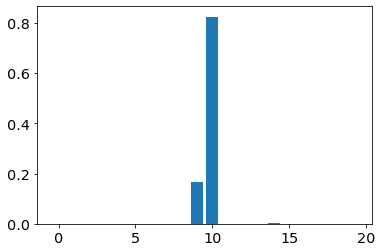

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

df_train_feature_selection_rf = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                                       'Peringkat Indeks Pembangunan Manusia (2020)',
                                                       'Peringkat Indeks Pembangunan Manusia (2021)'])
  
X = df_train_feature_selection_rf.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_feature_selection_rf["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [ ]:
df_train_rf = df_train_feature_selection_rf[['Umur Harapan Hidup Saat Lahir (UHH) (2019)',
                                             'Umur Harapan Hidup Saat Lahir (UHH) (2020)',
                                             'Umur Harapan Hidup Saat Lahir (UHH) (2021)']]

In [ ]:
X = df_train_rf.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_rf["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

eval_regression(rf, pred, X_train, y_train, X_test, y_test)

MAE: 0.06726
RMSE: 0.08947
R2 score: 0.99926


In [ ]:
pred_train = rf.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9996001625921552
RMSE score:  0.06901842864931648


### Percobaan 1 tanpa menggunakan feature peringkat indeks pembangunan manusia *2019* - 2021 dengan standarisasi

In [ ]:
df_train_rf1 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                      'Peringkat Indeks Pembangunan Manusia (2020)',
                                      'Peringkat Indeks Pembangunan Manusia (2021)'])
  
X = df_train_rf1.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_rf1["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

eval_regression(rf, pred, X_train, y_train, X_test, y_test)

MAE: 0.28867
RMSE: 0.35063
R2 score: 0.98863


In [ ]:
pred_train = rf.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9992937642379923
RMSE score:  0.0917272151545021


### Percobaan 2 tanpa menggunakan feature peringkat indeks pembangunan manusia 2019 - 2021 dan indeks keparahan kemiskinan 2019 - 2021 dengan standarisasi

In [ ]:
df_train_rf2 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                      'Peringkat Indeks Pembangunan Manusia (2020)',
                                      'Peringkat Indeks Pembangunan Manusia (2021)',
                                      'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                                      'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                                      'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '])
  
X = df_train_rf2.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_rf2["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

eval_regression(rf, pred, X_train, y_train, X_test, y_test)

MAE: 0.28130
RMSE: 0.34574
R2 score: 0.98894


In [ ]:
pred_train = rf.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9991911320157159
RMSE score:  0.0981662449733833


### Percobaan 3 dengan Tuning Parameter Random Forest tanpa menggunakan feature peringkat indeks pembangunan manusia 2019 - 2021 dan indeks keparahan kemiskinan 2019 - 2021 dengan standarisasi

In [ ]:
df_train_rf3 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                      'Peringkat Indeks Pembangunan Manusia (2020)',
                                      'Peringkat Indeks Pembangunan Manusia (2021)',
                                      'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                                      'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                                      'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '])
  
X = df_train_rf3.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_rf3["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters yang akan diuji
param_grid = {
    'bootstrap': [True],
    'max_depth': [16, 24, 32],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100]
}

# Init
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [16, 24, 32],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100]})

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
# Random Forest
new_rf_tuning = RandomForestRegressor(bootstrap=True, max_depth=16, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100)
new_rf_tuning.fit(X_train, y_train)
pred = new_rf_tuning.predict(X_test)

eval_regression(rf, pred, X_train, y_train, X_test, y_test)

MAE: 0.57795
RMSE: 0.77396
R2 score: 0.94459


In [ ]:
pred_train = new_rf_tuning.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.97305416479144
RMSE score:  0.5665903592200976


## Percobaan XGBoost

### XGBoost Feature Importance

[08:58:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.01976
Feature: 1, Score: 0.00050
Feature: 2, Score: 0.00044
Feature: 3, Score: 0.00759
Feature: 4, Score: 0.00065
Feature: 5, Score: 0.00079
Feature: 6, Score: 0.00050
Feature: 7, Score: 0.00051
Feature: 8, Score: 0.00066
Feature: 9, Score: 0.15198
Feature: 10, Score: 0.80902
Feature: 11, Score: 0.00061
Feature: 12, Score: 0.00074
Feature: 13, Score: 0.00047
Feature: 14, Score: 0.00031
Feature: 15, Score: 0.00092
Feature: 16, Score: 0.00115
Feature: 17, Score: 0.00189
Feature: 18, Score: 0.00056
Feature: 19, Score: 0.00093


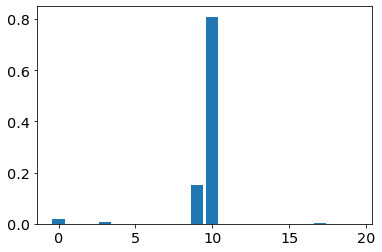

In [ ]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

df_train_xgb_feature_selection = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                                        'Peringkat Indeks Pembangunan Manusia (2020)',
                                                        'Peringkat Indeks Pembangunan Manusia (2021)'])
  
X = df_train_xgb_feature_selection.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_xgb_feature_selection["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

# Random Forest
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
importance = model_xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


In [ ]:
df_train_xgb = df_train_xgb_feature_selection[['Umur Harapan Hidup Saat Lahir (UHH) (2019)',
       'Umur Harapan Hidup Saat Lahir (UHH) (2020)','Umur Harapan Hidup Saat Lahir (UHH) (2021)']]

In [ ]:
X = df_train_xgb.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_xgb["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
# XGBoost
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)

eval_regression(model_xgb, pred, X_train, y_train, X_test, y_test)

[08:58:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.10765
RMSE: 0.13596
R2 score: 0.99829


In [ ]:
pred_train = model_xgb.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9994560214128217
RMSE score:  0.08050340654895885


### Percobaan 1 tanpa menggunakan feature peringkat indeks pembangunan manusia *2019* - 2021 dengan standarisasi

In [ ]:
df_train_xgb1 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                       'Peringkat Indeks Pembangunan Manusia (2020)',
                                       'Peringkat Indeks Pembangunan Manusia (2021)'])
  
X = df_train_xgb1.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_xgb1["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
# XGBoost
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)

eval_regression(model_xgb, pred, X_train, y_train, X_test, y_test)

[08:59:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.26846
RMSE: 0.30777
R2 score: 0.99124


In [ ]:
pred_train = model_xgb.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9995351975184564
RMSE score:  0.07441450116700839


### Percobaan 2 tanpa menggunakan feature peringkat indeks pembangunan manusia 2019 - 2021 dan indeks keparahan kemiskinan 2019 - 2021 dengan standarisasi

In [ ]:
df_train_xgb2 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                       'Peringkat Indeks Pembangunan Manusia (2020)',
                       'Peringkat Indeks Pembangunan Manusia (2021)',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '])
  
X = df_train_xgb2.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_xgb2["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
# XGBoost
model_xgb = xgb.XGBRegressor()
model_xgb.fit(X_train, y_train)
pred = model_xgb.predict(X_test)

eval_regression(model_xgb, pred, X_train, y_train, X_test, y_test)

[08:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.27034
RMSE: 0.30950
R2 score: 0.99114


In [ ]:
pred_train = model_xgb.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9995114519855092
RMSE score:  0.07629164550265627


### Percobaan 3 dengan Tuning Parameter XGBoost tanpa menggunakan feature peringkat indeks pembangunan manusia 2019 - 2021 dan indeks keparahan kemiskinan 2019 - 2021 dengan standarisasi

In [ ]:
df_train_xgb3 = df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                                       'Peringkat Indeks Pembangunan Manusia (2020)',
                                       'Peringkat Indeks Pembangunan Manusia (2021)',
                                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '])
  
X = df_train_xgb3.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train_xgb3["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBRegressor()
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

[09:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1909, in recall_score
    zero_division=zero_division,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 1544, in precision_recall_fscore_support
    labels = _check_set_wise_label

[09:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:00:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'alpha': [0.0, 0.1, 0.2,
                                                  0.30000000000000004, 0.4, 0.5,
                                                  0.6000000000000001,
                                                  0.7000000000000001, 0.8, 0.9,
                                                  1.0],
                                        'colsample_bytree': [0.0, 0.1, 0.2,
                                                             0.30000000000000004,
                                                             0.4, 0.5,
                                                             0.6000000000000001,
                                                             0.7000000000000001,
                                                             0.8, 0.9, 1.0],
                                        'eta': [0.0, 0.010101010101010102,
                                                0.0202

In [ ]:
xg_tuned.best_params_

{'alpha': 0.8,
 'colsample_bytree': 0.30000000000000004,
 'eta': 0.33333333333333337,
 'gamma': 0.5,
 'lambda': 0.8,
 'max_depth': 50,
 'min_child_weight': 18,
 'tree_method': 'approx'}

In [ ]:
new_xgb = XGBRegressor(reg_alpha=0.8, colsample_bytree=0.3, eta=0.33, gamma=0.5, reg_lambda=0.8, max_depth=50, min_child_weight=19, tree_method="approx")

In [ ]:
new_xgb.fit(X_train, y_train)
pred = new_xgb.predict(X_test)

eval_regression(new_xgb, pred, X_train, y_train, X_test, y_test)

[09:01:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.40536
RMSE: 0.54118
R2 score: 0.97291


In [ ]:
pred_train = new_xgb.predict(X_train)
r2 = r2_score(y_train, pred_train)
rmse = mean_squared_error(y_train, pred_train, squared=False)
print("R2 score: ", r2)
print("RMSE score: ", rmse)

R2 score:  0.9827972114578754
RMSE score:  0.4527128077110006


## Percobaan Neural Network

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from keras.models import Sequential
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense
import tensorflow as tf
from sklearn.utils import shuffle

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/fikridivas/DSC-MCF-ITB/main/Data_Train.csv')

In [ ]:
df_train.drop(columns=["Id", "Kabupaten/Kota"], inplace=True)

In [ ]:
# cek data duplikat
df_train.duplicated().sum()

0

In [ ]:
df_train.drop(columns=['Peringkat Indeks Pembangunan Manusia (2019)',
                       'Peringkat Indeks Pembangunan Manusia (2020)',
                       'Peringkat Indeks Pembangunan Manusia (2021)',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2019) ',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2020) ',
                       'Indeks Keparahan Kemiskinan (P2) Menurut Kabupaten/Kota (2021) '], inplace=True)
    
X = df_train.drop(columns="Umur Harapan Hidup Saat Lahir (UHH) (2021)")
y = df_train["Umur Harapan Hidup Saat Lahir (UHH) (2021)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)

In [ ]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(500, input_dim=17, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))

In [ ]:
model.compile(loss= "mean_squared_error" , optimizer=tf.keras.optimizers.RMSprop(0.001), metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=500)

Epoch 1/500
11/11 [==============================] - 4s 8ms/step - loss: 4007.5010 - mean_squared_error: 4007.5010
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 2029.9031 - mean_squared_error: 2029.9031
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 1337.9774 - mean_squared_error: 1337.9774
Epoch 4/500
11/11 [==============================] - 0s 8ms/step - loss: 840.6205 - mean_squared_error: 840.6205
Epoch 5/500
11/11 [==============================] - 0s 8ms/step - loss: 520.1523 - mean_squared_error: 520.1523
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 367.1984 - mean_squared_error: 367.1984
Epoch 7/500
11/11 [==============================] - 0s 8ms/step - loss: 296.6113 - mean_squared_error: 296.6113
Epoch 8/500
11/11 [==============================] - 0s 8ms/step - loss: 245.3407 - mean_squared_error: 245.3407
Epoch 9/500
11/11 [==============================] - 0s 8ms/step - loss: 196.3629 - mean_s

In [ ]:
from sklearn.metrics import mean_squared_error

pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))
r2_train = r2_score(y_train, pred_train)
print("R2 Score Train: ", r2_train)

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 
r2_test = r2_score(y_test, pred)
print("R2 Score Test: ", r2_test)


4.7190580028979765
R2 Score Train:  -0.8692350640200381
3.50397963026913
R2 Score Test:  -0.13573027604453225


## Modelling Conclussion

Dari hasil beberapa percobaan yang dilakukan di dapatkan model terbaik ada di model **Linear Regression** dengan **Percobaan ke 3 Melakukan Log pada data Indeks Kedalaman Kemiskinan (P1), menghilangkan feature peringkat indeks pembangunan manusia 2019 - 2021 dan indeks keparahan kemiskinan 2019 - 2021 dan tidak melakukan proses standarisasi** dikarenakan memiliki nilai RMSE yang paling kecil dan nilai R^2 yang tinggi hampir mendekati 1. Sehingga model hasil percobaan tersebut bisa digunakan untuk ke tahap model deployment